## **Importing Libraries**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import warnings
warnings.filterwarnings("ignore")

## **Data Loading & Preprocessing**

In [4]:
Matches = pd.read_csv("matches.csv")
Deliveries = pd.read_csv("deliveries.csv")

In [5]:
Matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [6]:
Matches['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [7]:
constant_teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
    'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
    'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
    'Sunrisers Hyderabad'
]

name_mapping = {
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Gujarat Lions': 'Gujarat Titans'
}

Matches['team1'] = Matches['team1'].apply(lambda x: name_mapping.get(x, x))
Matches['team2'] = Matches['team2'].apply(lambda x: name_mapping.get(x, x))
Matches['toss_winner'] = Matches['toss_winner'].apply(lambda x: name_mapping.get(x, x))
Matches['winner'] = Matches['winner'].apply(lambda x: name_mapping.get(x, x))

Matches = Matches[Matches['team1'].isin(constant_teams) & Matches['team2'].isin(constant_teams)]

Matches = Matches.reset_index(drop=True)

unwanted_columns = ['season', 'city', 'date', 'match_type', 'toss_decision', 'result_margin', 'super_over', 'method', 'umpire1', 'umpire2']
Matches.drop(labels=unwanted_columns, axis=1, inplace=True)

Matches.head()

,id,player_of_match,venue,team1,team2,toss_winner,winner,result,target_runs,target_overs
0,335982,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,runs,223.0,20.0
1,335983,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,runs,241.0,20.0
2,335984,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,Delhi Capitals,wickets,130.0,20.0
3,335985,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,wickets,166.0,20.0
4,335986,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,Kolkata Knight Riders,wickets,111.0,20.0


In [8]:
Deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [9]:
constant_teams = [
    'Chennai Super Kings', 'Delhi Capitals', 'Gujarat Titans',
    'Kolkata Knight Riders', 'Lucknow Super Giants', 'Mumbai Indians',
    'Punjab Kings', 'Rajasthan Royals', 'Royal Challengers Bangalore',
    'Sunrisers Hyderabad'
]

name_mapping = {
    'Deccan Chargers': 'Sunrisers Hyderabad',
    'Kings XI Punjab': 'Punjab Kings',
    'Delhi Daredevils': 'Delhi Capitals',
    'Royal Challengers Bengaluru': 'Royal Challengers Bangalore',
    'Gujarat Lions': 'Gujarat Titans'
}

Deliveries['batting_team'] = Deliveries['batting_team'].apply(lambda x: name_mapping.get(x, x))
Deliveries['bowling_team'] = Deliveries['bowling_team'].apply(lambda x: name_mapping.get(x, x))

Deliveries = Deliveries[Deliveries['batting_team'].isin(constant_teams) & Deliveries['bowling_team'].isin(constant_teams)]

Deliveries = Deliveries.reset_index(drop=True)

unwanted_columns = ['fielder']

Deliveries.drop(labels=unwanted_columns, axis=1, inplace=True)
Deliveries['score'] = Deliveries.groupby(['match_id', 'inning'])['total_runs'].cumsum()

Deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,score
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,1
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,1
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,2
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,2
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,2


In [10]:
print(sorted(Matches['venue'].unique()))

['Arun Jaitley Stadium', 'Arun Jaitley Stadium, Delhi', 'Barabati Stadium', 'Barsapara Cricket Stadium, Guwahati', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow', 'Brabourne Stadium', 'Brabourne Stadium, Mumbai', 'Buffalo Park', 'De Beers Diamond Oval', 'Dr DY Patil Sports Academy', 'Dr DY Patil Sports Academy, Mumbai', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam', 'Dubai International Cricket Stadium', 'Eden Gardens', 'Eden Gardens, Kolkata', 'Feroz Shah Kotla', 'Green Park', 'Himachal Pradesh Cricket Association Stadium', 'Himachal Pradesh Cricket Association Stadium, Dharamsala', 'Holkar Cricket Stadium', 'JSCA International Stadium Complex', 'Kingsmead', 'M Chinnaswamy Stadium', 'M Chinnaswamy Stadium, Bengaluru', 'M.Chinnaswamy Stadium', 'MA Chidambaram Stadium', 'MA Chidambaram Stadium, Chepauk', 'MA Chidambaram Stadium, Chepauk, Chennai', 'Maharaja Yadavindra Singh Internation

In [11]:
name_mapping={
    'Arun Jaitley Stadium': 'Arun Jaitley Stadium, Delhi',
    'Brabourne Stadium': 'Brabourne Stadium, Mumbai',
    'Dr DY Patil Sports Academy': 'Dr DY Patil Sports Academy, Mumbai',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam',
    'Eden Gardens': 'Eden Gardens, Kolkata',
    'Feroz Shah Kotla': 'Arun Jaitley Stadium, Delhi',
    'Himachal Pradesh Cricket Association Stadium': 'Himachal Pradesh Cricket Association Stadium, Dharamsala',
    'M Chinnaswamy Stadium': 'M Chinnaswamy Stadium, Bengaluru',
    'M.Chinnaswamy Stadium': 'M Chinnaswamy Stadium, Bengaluru',
    'MA Chidambaram Stadium': 'MA Chidambaram Stadium, Chepauk, Chennai',
    'MA Chidambaram Stadium, Chepauk': 'MA Chidambaram Stadium, Chepauk, Chennai',
    'Maharashtra Cricket Association Stadium': 'Maharashtra Cricket Association Stadium, Pune',
    'Sardar Patel Stadium, Motera': 'Narendra Modi Stadium, Ahmedabad',
    'Punjab Cricket Association IS Bindra Stadium': 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
    'Punjab Cricket Association Stadium, Mohali': 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
    'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur': 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
    'Rajiv Gandhi International Stadium': 'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
    'Rajiv Gandhi International Stadium, Uppal': 'Rajiv Gandhi International Stadium, Uppal, Hyderabad',
    'Sawai Mansingh Stadium': 'Sawai Mansingh Stadium, Jaipur',
    'Wankhede Stadium': 'Wankhede Stadium, Mumbai'
}

Matches['venue'].replace(name_mapping, inplace = True)

In [12]:
homes={
    'Chennai Super Kings': 'MA Chidambaram Stadium, Chepauk, Chennai',
    'Delhi Capitals': 'Arun Jaitley Stadium, Delhi',
    'Gujarat Titans': 'Narendra Modi Stadium, Ahmedabad',
    'Kolkata Knight Riders': 'Eden Gardens, Kolkata',
    'Lucknow Super Giants': 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow',
    'Mumbai Indians': 'Wankhede Stadium, Mumbai',
    'Punjab Kings': 'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh',
    'Rajasthan Royals': 'Sawai Mansingh Stadium, Jaipur',
    'Royal Challengers Bangalore': 'M Chinnaswamy Stadium, Bengaluru',
    'Sunrisers Hyderabad': 'Rajiv Gandhi International Stadium, Uppal, Hyderabad'
}

Matches.insert(10, "Home_Win", None)
Matches.insert(11, "loser", None)
Matches.insert(12, "Home_Loss", None)
Matches['Home_Win'] = Matches.apply(lambda row: homes.get(row['winner'], '') == row['venue'], axis=1)
Matches['loser'] = Matches.apply(lambda row: row['team1'] if row['team2'] == row['winner'] else row['team2'], axis=1)
Matches['Home_Loss'] = Matches.apply(lambda row: homes.get(row['loser'], '') == row['venue'], axis=1)

In [13]:
Matches.insert(13, "Neutral", None)
Matches['Neutral'] = Matches.apply(lambda row: True if row['Home_Win'] == False and row['Home_Loss'] == False else np.nan, axis=1)
Matches.head(5)

,id,player_of_match,venue,team1,team2,toss_winner,winner,result,target_runs,target_overs,Home_Win,loser,Home_Loss,Neutral
0,335982,BB McCullum,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,runs,223.0,20.0,False,Royal Challengers Bangalore,True,NaN
1,335983,MEK Hussey,"Punjab Cricket Association IS Bindra Stadium, ...",Punjab Kings,Chennai Super Kings,Chennai Super Kings,Chennai Super Kings,runs,241.0,20.0,False,Punjab Kings,True,NaN
2,335984,MF Maharoof,"Arun Jaitley Stadium, Delhi",Delhi Capitals,Rajasthan Royals,Rajasthan Royals,Delhi Capitals,wickets,130.0,20.0,True,Rajasthan Royals,False,NaN
3,335985,MV Boucher,"Wankhede Stadium, Mumbai",Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,wickets,166.0,20.0,False,Mumbai Indians,True,NaN
4,335986,DJ Hussey,"Eden Gardens, Kolkata",Kolkata Knight Riders,Sunrisers Hyderabad,Sunrisers Hyderabad,Kolkata Knight Riders,wickets,111.0,20.0,True,Sunrisers Hyderabad,False,NaN


## **Exploratory Data Analysis**

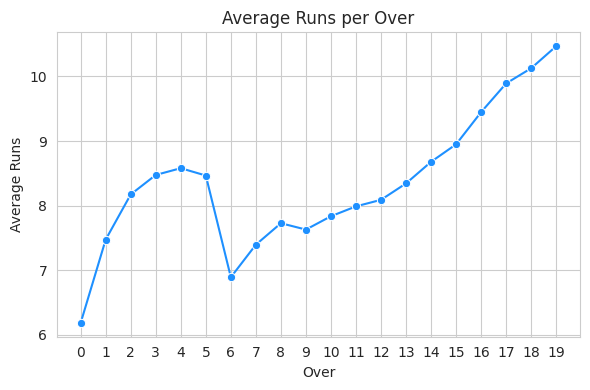

In [14]:
over_end_scores = Deliveries.groupby(['match_id', 'inning', 'over']).last().reset_index()

over_end_scores['over_runs'] = over_end_scores.groupby(['match_id', 'inning'])['score'].diff()
over_end_scores['over_runs'] = over_end_scores['over_runs'].fillna(over_end_scores['score'])

avg_runs_per_over = over_end_scores.groupby('over')['over_runs'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.set_style("whitegrid")
sns.lineplot(data=avg_runs_per_over, x='over', y='over_runs', marker='o', color='dodgerblue')
plt.title("Average Runs per Over")
plt.xlabel("Over")
plt.ylabel("Average Runs")
plt.xticks(avg_runs_per_over['over'])
plt.tight_layout()
plt.show()

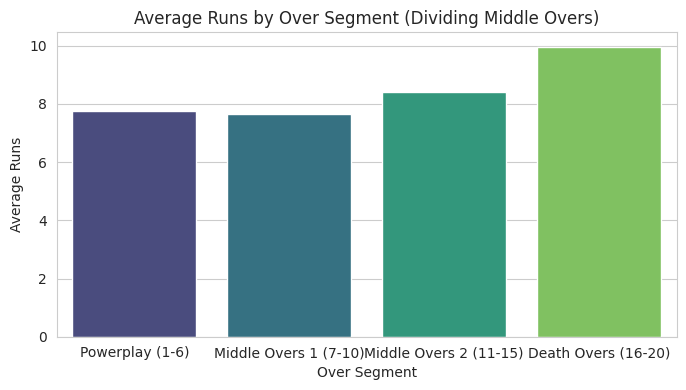

In [15]:
over_end_scores = Deliveries.groupby(['match_id', 'inning', 'over']).last().reset_index()

over_end_scores['over_runs'] = over_end_scores.groupby(['match_id', 'inning'])['score'].diff()
over_end_scores['over_runs'] = over_end_scores['over_runs'].fillna(over_end_scores['score'])

def assign_segment(over):
    if over <= 6:
        return "Powerplay (1-6)"
    elif 7 <= over <= 10:
        return "Middle Overs 1 (7-10)"
    elif 11 <= over <= 15:
        return "Middle Overs 2 (11-15)"
    else:
        return "Death Overs (16-20)"

over_end_scores['over_segment'] = over_end_scores['over'].apply(assign_segment)

avg_runs_segment = over_end_scores.groupby('over_segment')['over_runs'].mean().reset_index()

segment_order = ["Powerplay (1-6)", "Middle Overs 1 (7-10)", "Middle Overs 2 (11-15)", "Death Overs (16-20)"]
avg_runs_segment['over_segment'] = pd.Categorical(avg_runs_segment['over_segment'],
                                                  categories=segment_order, ordered=True)
avg_runs_segment = avg_runs_segment.sort_values('over_segment')

plt.figure(figsize=(7,4))
sns.set_style("whitegrid")
sns.barplot(data=avg_runs_segment, x='over_segment', y='over_runs', palette='viridis')
plt.xlabel("Over Segment")
plt.ylabel("Average Runs")
plt.title("Average Runs by Over Segment (Dividing Middle Overs)")
plt.tight_layout()
plt.show()


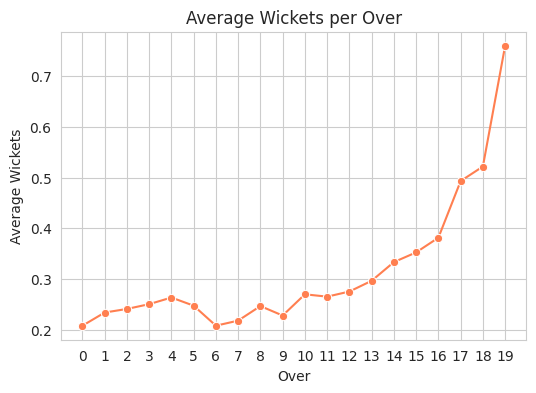

In [16]:
over_wickets = Deliveries.groupby(['match_id', 'inning', 'over'])['is_wicket'].sum().reset_index()
over_wickets.columns = ['match_id', 'inning', 'over', 'wickets_in_over']

avg_wickets = over_wickets.groupby('over')['wickets_in_over'].mean().reset_index()

plt.figure(figsize=(6, 4))
sns.set_style("whitegrid")
sns.lineplot(data=avg_wickets, x='over', y='wickets_in_over', marker='o', color='coral')
plt.title("Average Wickets per Over")
plt.xlabel("Over")
plt.ylabel("Average Wickets")
plt.xticks(avg_wickets['over'])
plt.show()

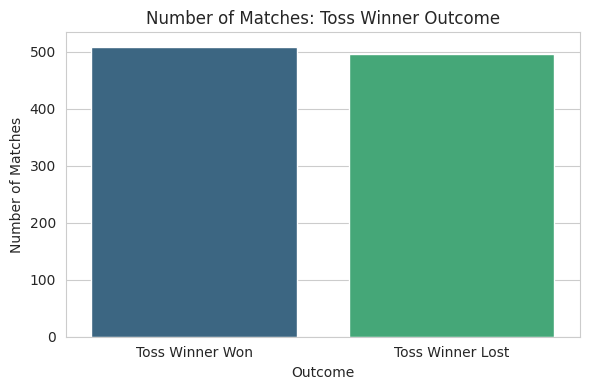

In [17]:
Matches['toss_match_win'] = Matches['toss_winner'] == Matches['winner']

result_counts = Matches['toss_match_win'].value_counts().reset_index()
result_counts.columns = ['Outcome', 'Count']

result_counts['Outcome'] = result_counts['Outcome'].map({True: 'Toss Winner Won', False: 'Toss Winner Lost'})

plt.figure(figsize=(6, 4))
ax = sns.barplot(data=result_counts, x='Outcome', y='Count', palette='viridis')
plt.title("Number of Matches: Toss Winner Outcome")
plt.xlabel("Outcome")
plt.ylabel("Number of Matches")
plt.tight_layout()
plt.show()

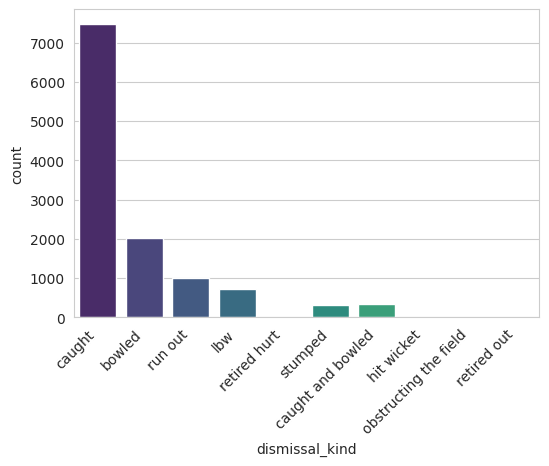

In [18]:
plt.figure(figsize=(6,4))
sns.countplot(x='dismissal_kind', data=Deliveries, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.show()

**Franchise Analysis**

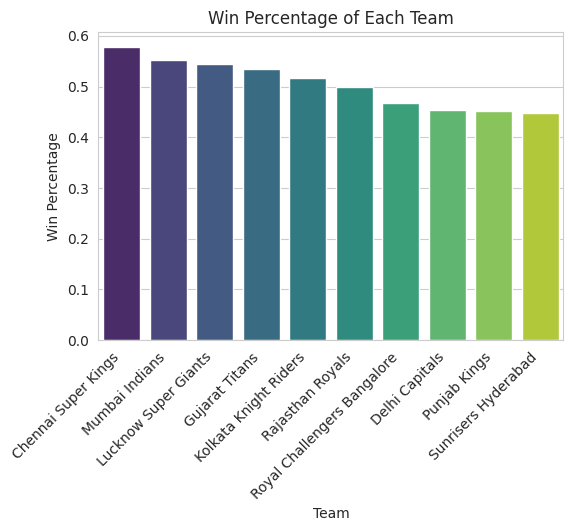

In [19]:
team_wins = Matches['winner'].value_counts()
team_matches = Matches['team1'].value_counts() + Matches['team2'].value_counts()
win_percentage = (team_wins / team_matches).sort_values(ascending=False)

plt.figure(figsize=(6, 4))
sns.barplot(x=win_percentage.index, y=win_percentage.values,palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.title('Win Percentage of Each Team')
plt.show()

**Top Players**

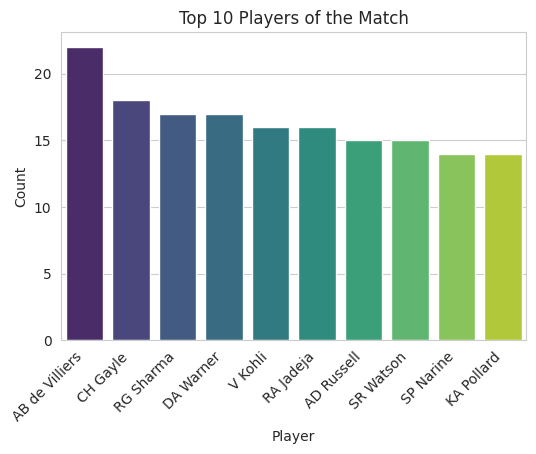

In [20]:
plt.figure(figsize=(6, 4))

top_players = Matches['player_of_match'].value_counts().head(10)

sns.barplot(x=top_players.index, y=top_players.values,palette='viridis')

plt.xticks(rotation=45, ha='right')

plt.xlabel('Player')
plt.ylabel('Count')

plt.title('Top 10 Players of the Match')

plt.show()

**Batsmen Analysis**

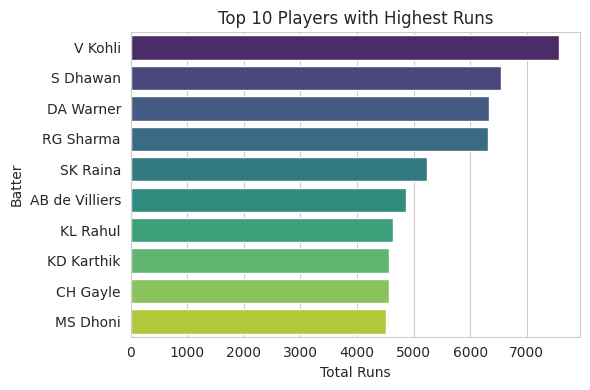

In [21]:
runs_df = Deliveries.groupby('batter')['batsman_runs'].sum().reset_index()

top10 = runs_df.sort_values(by='batsman_runs', ascending=False).head(10)

plt.figure(figsize=(6, 4))
sns.barplot(x='batsman_runs', y='batter', data=top10, palette='viridis')
plt.title("Top 10 Players with Highest Runs")
plt.xlabel("Total Runs")
plt.ylabel("Batter")
plt.tight_layout()
plt.show()

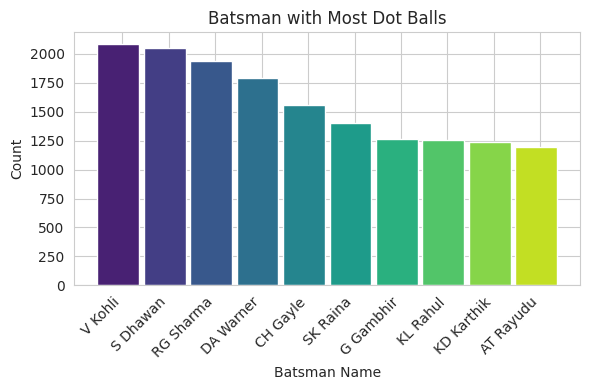

In [22]:
temp_df = Deliveries.groupby('batter')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index()
temp_df = temp_df.sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10, :]

labels = np.array(temp_df['batter'])
ind = np.arange(len(labels))
width = 0.9

colors = sns.color_palette('viridis', len(labels))

fig, ax = plt.subplots(figsize=(6, 4))
rects = ax.bar(ind, temp_df['batsman_runs'], width=width, color=colors)
ax.set_xticks(ind + width/10.)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel("Count")
ax.set_title("Batsman with Most Dot Balls")
ax.set_xlabel("Batsman Name")
plt.tight_layout()
plt.show()

**Bowler Analysis**

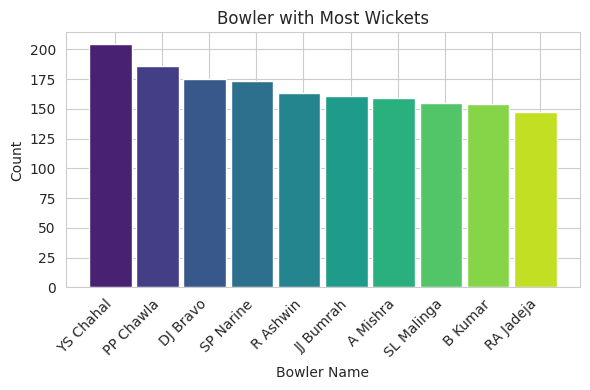

In [23]:
bowler_wicket_type=['bowled', 'caught', 'stumped', 'lbw', 'caught and bowled', 'hit wicket']
temp_df = Deliveries[Deliveries['dismissal_kind'].isin(bowler_wicket_type)]
temp_df = temp_df.groupby('bowler')['is_wicket'].agg(lambda x: (x==1).sum()).reset_index()
temp_df = temp_df.sort_values(by='is_wicket', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10, :]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9

colors = sns.color_palette('viridis', len(labels))

fig, ax = plt.subplots(figsize=(6, 4))
rects = ax.bar(ind, temp_df['is_wicket'], width=width, color=colors)
ax.set_xticks(ind + width/10.)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel("Count")
ax.set_title("Bowler with Most Wickets")
ax.set_xlabel("Bowler Name")
plt.tight_layout()
plt.show()

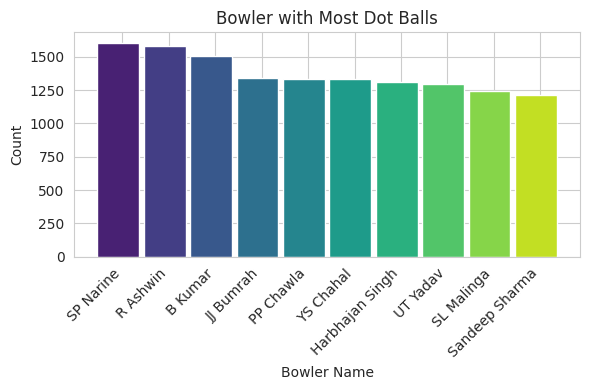

In [24]:
temp_df = Deliveries.groupby('bowler')['batsman_runs'].agg(lambda x: (x==0).sum()).reset_index()
temp_df = temp_df.sort_values(by='batsman_runs', ascending=False).reset_index(drop=True)
temp_df = temp_df.iloc[:10, :]

labels = np.array(temp_df['bowler'])
ind = np.arange(len(labels))
width = 0.9

colors = sns.color_palette('viridis', len(labels))

fig, ax = plt.subplots(figsize=(6, 4))
rects = ax.bar(ind, temp_df['batsman_runs'], width=width, color=colors)
ax.set_xticks(ind + width/10.)
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_ylabel("Count")
ax.set_title("Bowler with Most Dot Balls")
ax.set_xlabel("Bowler Name")
plt.tight_layout()
plt.show()

**Team Analysis on Home and Away Conditions**

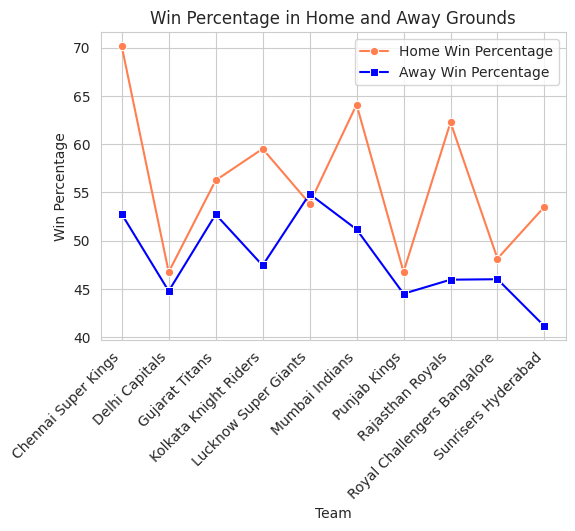

In [25]:
homewins = Matches.groupby('winner')['Home_Win'].agg(lambda x: (x==True).sum()).reset_index()
homeloss = Matches.groupby('loser')['Home_Loss'].agg(lambda x: (x==True).sum()).reset_index()

homegames = pd.merge(homewins, homeloss, left_on='winner', right_on='loser', how='outer').fillna(0)
homegames['Home_Games'] = homegames['Home_Win'] + homegames['Home_Loss']
homegames.rename(columns={'winner': 'Team'}, inplace=True)
homegames.drop(columns=['loser'], inplace=True)
homegames['Win_Percentage'] = (homegames['Home_Win'] / homegames['Home_Games']) * 100

temp_df1 = team_matches.to_frame().reset_index()
temp_df1.columns = ['Team', 'Played']

temp_df2 = team_wins.to_frame().reset_index()
temp_df2.columns = ['Team', 'Wins']

awaygames = pd.merge(homegames, temp_df1, left_on='Team', right_on='Team', how='outer').fillna(0)
awaygames = pd.merge(awaygames, temp_df2, left_on='Team', right_on='Team', how='outer').fillna(0)
awaygames['Win_Percentage'] = ((awaygames['Wins'] - awaygames['Home_Win']) / (awaygames['Played'] - awaygames['Home_Games'])) * 100

plt.figure(figsize=(6, 4))
sns.lineplot(x=homegames['Team'], y=homegames['Win_Percentage'], marker='o', color='coral', label='Home Win Percentage')
sns.lineplot(x=awaygames['Team'], y=awaygames['Win_Percentage'], marker='s', color='blue', label='Away Win Percentage')
plt.title("Win Percentage in Home and Away Grounds")
plt.xlabel("Team")
plt.ylabel("Win Percentage")
plt.xticks(homegames['Team'], rotation=45, ha='right')
plt.show()

In [26]:
Matches.to_csv('matches_processed.csv', index=False)
Deliveries.to_csv('deliveries_processed.csv', index=False)